In [1]:
import numpy as np
import pandas as pd
import librosa as lib
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,multilabel_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import coo_matrix


## Importar los rttm y convertirlos en un df

In [2]:
import numpy as np
import pandas as pd

def read_rttm(file_path):
    columns = ['Type', 'File ID', 'Channel', 'Start Time', 'Duration', 'Ortho', 'Ortho1', 'SType', 'Conf']
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
    df['Start Time'] = df['Start Time'].astype(float)
    df['Duration'] = df['Duration'].astype(float)
    df['Conf'] = df['Conf'].astype(float)
    return df

def read_rttm_diar(file_path):
    columns = ['Type', 'File ID', 'Channel', 'Start Time', 'Duration', 'Ortho1', 'Ortho2', 'SType', 'Name1', 'Name2']
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
    df['Start Time'] = df['Start Time'].astype(float)
    df['Duration'] = df['Duration'].astype(float)
    return df

file_path_rttm = 'raw_ROS_HV-master/raw_ROS_HV-master_nombres/biancak-a2-nsb.rttm'
file_path_diar = 'raw_ROS_HV-master/raw_ROS_HV-master_nombres/biancak-a2-nsb-diarization.rttm'

df_rttm = read_rttm(file_path_rttm)
df_rttm_diar = read_rttm_diar(file_path_diar)



In [8]:
print(df_rttm['SType'].unique().tolist())


['CHI', 'FA1', 'code', 'MC1', 'MA1', 'EE1', 'MC2', 'FC1', 'FA2', 'FA3', 'FA4', 'FA5', 'FA6', 'MC3', 'FA7', 'MA2', 'MC4', 'UC1']


In [12]:
conditions = [
    df_rttm["SType"] == "CHI",
    df_rttm["SType"].str.startswith("F"),
    df_rttm["SType"].str.startswith("M"),
    df_rttm["SType"].str.startswith("UC")
]

choices = ["KCHI", "FEM", "MAL", "OCH"]

df_rttm["STypeNew"] = np.select(conditions, choices, default=df_rttm["SType"])
df_rttm


,Type,File ID,Channel,Start Time,Duration,Ortho,Ortho1,SType,Conf,STypeNew
0,SPEAKER,biancak-a2-nsb,1,123.88,0.65,NaN,NaN,CHI,1.0,KCHI
1,SPEAKER,biancak-a2-nsb,1,140.27,4.26,NaN,NaN,CHI,1.0,KCHI
2,SPEAKER,biancak-a2-nsb,1,145.02,1.08,NaN,NaN,CHI,1.0,KCHI
3,SPEAKER,biancak-a2-nsb,1,149.05,0.64,NaN,NaN,CHI,1.0,KCHI
4,SPEAKER,biancak-a2-nsb,1,151.03,0.98,NaN,NaN,CHI,1.0,KCHI
...,...,...,...,...,...,...,...,...,...,...
841,SPEAKER,biancak-a2-nsb,1,11512.75,0.57,NaN,NaN,MC4,1.0,MAL
842,SPEAKER,biancak-a2-nsb,1,12639.02,0.39,NaN,NaN,MC4,1.0,MAL
843,SPEAKER,biancak-a2-nsb,1,13297.77,0.39,NaN,NaN,MC4,1.0,MAL
844,SPEAKER,biancak-a2-nsb,1,13308.74,1.21,NaN,NaN,MC4,1.0,MAL


In [14]:
# Modificar columnas
df_rttm_diar['Type'] = 'Diar'
df_rttm['Type'] = 'Elan'
df_rttm = df_rttm[['Type', 'File ID', 'Start Time', 'Duration', 'STypeNew']]



# Concatenar DataFrames
df_both = pd.concat([df_rttm, df_rttm_diar])

# Extraer el nombre entre 'casos/' y la siguiente '/'
name = "biancak-a2-nsb"


print(name)

# Verificar el contenido del DataFrame concatenado
print("Contenido de df_both:")
print(df_both)


biancak-a2-nsb
Contenido de df_both:
      Type                     File ID  Start Time  Duration STypeNew  \
0     Elan              biancak-a2-nsb     123.880     0.650     KCHI   
1     Elan              biancak-a2-nsb     140.270     4.260     KCHI   
2     Elan              biancak-a2-nsb     145.020     1.080     KCHI   
3     Elan              biancak-a2-nsb     149.050     0.640     KCHI   
4     Elan              biancak-a2-nsb     151.030     0.980     KCHI   
...    ...                         ...         ...       ...      ...   
6218  Diar  biancak-a2-nsb.diarization   14631.909     1.681      NaN   
6219  Diar  biancak-a2-nsb.diarization   14632.010     1.660      NaN   
6220  Diar  biancak-a2-nsb.diarization   14634.290     1.958      NaN   
6221  Diar  biancak-a2-nsb.diarization   14634.493     1.799      NaN   
6222  Diar  biancak-a2-nsb.diarization   14635.492     0.597      NaN   

      Channel  Ortho1  Ortho2   SType  Name1  Name2  
0         NaN     NaN     NaN   

C:\Users\pablo\AppData\Local\Temp\ipykernel_8468\2334270780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rttm['Type'] = 'Elan'


In [15]:
df_both["STypeNew"].unique()
# Eliminar filas con NaN en la columna 'STypeNew'
df_both = df_both.dropna(subset=['STypeNew'])


In [5]:
# Define las variables para el análisis
start = 0
end = 12000
step = 0.1

# Inicializa listas para resultados
results = {
    'Elan_KCHI': [],
    'Elan_OCH': [],
    'Elan_FEM': [],
    'Elan_MAL': [],
    'Diar_KCHI': [],
    'Diar_OCH': [],
    'Diar_FEM': [],
    'Diar_MAL': []
}


In [7]:
# Crear la barra de progreso
num_steps = int((end - start) / step)  # Calcular el número total de pasos
with tqdm(total=num_steps, desc="Processing intervals") as pbar:
    # Analizar intervalos
    for i in np.arange(start, end, step):
        # Verificar presencia de cada tipo en el intervalo
        for key in results.keys():
            results[key].append(int(df_both[
                (df_both['Start Time'] <= i) & 
                (df_both['Start Time'] + df_both['Duration'] > i) & 
                (df_both['STypeNew'] == key.split('_')[1]) & 
                (df_both['Type'] == key.split('_')[0])
            ].shape[0] > 0))
        
        # Actualizar la barra de progreso
        pbar.update(1)

# Crear DataFrame de resultados
df_results= pd.DataFrame(results)

# Verificar el contenido del DataFrame de resultados
print("Contenido de df_results:")
print(df_results.head())

Processing intervals: 100%|██████████| 120000/120000 [15:57<00:00, 125.31it/s]


Contenido de df_results:
   Elan_KCHI  Elan_OCH  Elan_FEM  Elan_MAL  Diar_KCHI  Diar_OCH  Diar_FEM  \
0          0         0         0         0          0         0         0   
1          0         0         0         0          0         0         0   
2          0         0         0         0          0         0         0   
3          0         0         0         0          0         0         0   
4          0         0         0         0          0         0         0   

   Diar_MAL  
0         0  
1         0  
2         0  
3         0  
4         0  


In [15]:
df_results.to_csv(f"resultados/{name}/df_results_{name}.csv", index=False)


In [21]:
df_resultados= pd.read_csv(f"resultados/{name}/df_results_{name}.csv")
df_resultados

,Elan_KCHI,Elan_OCH,Elan_FEM,Elan_MAL,Diar_KCHI,Diar_OCH,Diar_FEM,Diar_MAL
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
239995,0,0,0,0,0,0,1,0
239996,0,0,0,0,0,0,0,0
239997,0,0,0,0,0,0,0,0
239998,0,0,0,0,0,0,0,0


In [22]:
# Definir las etiquetas
labels = ['KCHI', 'OCH', 'FEM', 'MAL']

# Extraer las etiquetas verdaderas y predichas
y_true = df_resultados[['Elan_KCHI', 'Elan_OCH', 'Elan_FEM', 'Elan_MAL']].values
y_pred = df_resultados[['Diar_KCHI', 'Diar_OCH', 'Diar_FEM', 'Diar_MAL']].values

# Calcular la matriz de confusión multilabel
conf_matrix = multilabel_confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión para cada etiqueta
for i, label in enumerate(labels):
    print(f"Matriz de confusión para la etiqueta {label}:")
    print(conf_matrix[i])
    print()

# Opcionalmente, puedes imprimir un informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_true, y_pred, target_names=labels))


Matriz de confusión para la etiqueta KCHI:
[[213524  25538]
 [   178    760]]

Matriz de confusión para la etiqueta OCH:
[[216726  23274]
 [     0      0]]

Matriz de confusión para la etiqueta FEM:
[[208618  31382]
 [     0      0]]

Matriz de confusión para la etiqueta MAL:
[[233488   6512]
 [     0      0]]

Informe de clasificación:
              precision    recall  f1-score   support

        KCHI       0.03      0.81      0.06       938
         OCH       0.00      0.00      0.00         0
         FEM       0.00      0.00      0.00         0
         MAL       0.00      0.00      0.00         0

   micro avg       0.01      0.81      0.02       938
   macro avg       0.01      0.20      0.01       938
weighted avg       0.03      0.81      0.06       938
 samples avg       0.00      0.00      0.00       938



C:\Users\pablo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


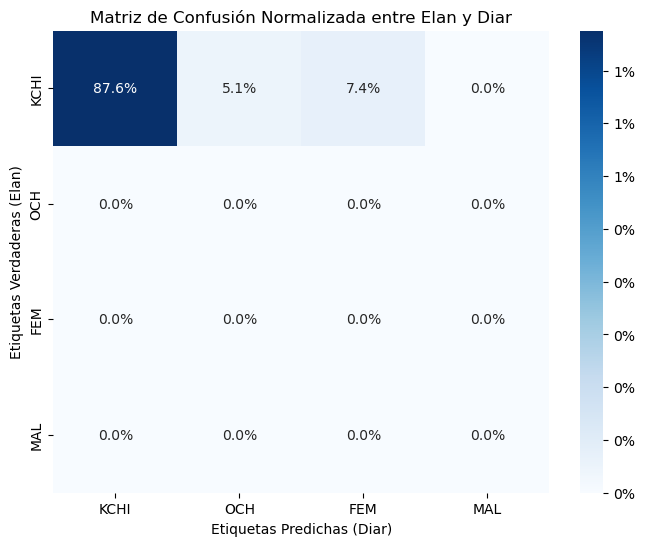

In [23]:
# Conversión de etiquetas multilabel a etiquetas de clase única (mismo código que antes)
def multilabel_to_singlelabel(y_multilabel):
    single_labels = []
    for row in y_multilabel:
        indices = np.where(row == 1)[0]
        if len(indices) == 0:
            single_labels.append(-1)  # Sin etiqueta
        else:
            # Si hay múltiples etiquetas, puedes decidir cómo manejarlas.
            # Aquí, tomamos la primera etiqueta encontrada.
            single_labels.append(indices[0])
    return np.array(single_labels)

y_true = multilabel_to_singlelabel(y_true)
y_pred = multilabel_to_singlelabel(y_pred)

# Filtrar las instancias sin etiqueta
valid_indices = y_true != -1
y_true = y_true[valid_indices]
y_pred = y_pred[valid_indices]

# Calcular la matriz de confusión normalizada
cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)), normalize='true')

# Crear un DataFrame para la matriz de confusión
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Crear las anotaciones con porcentajes
annot = cm_df.applymap(lambda x: '{0:.1f}%'.format(x*100))


# Crear el gráfico de la matriz de confusión con porcentajes
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=annot, fmt='', cmap='Blues', cbar_kws={'format': '%.0f%%'})
plt.title('Matriz de Confusión Normalizada entre Elan y Diar')
plt.ylabel('Etiquetas Verdaderas (Elan)')
plt.xlabel('Etiquetas Predichas (Diar)')

# Guardar la figura como un archivo PNG
plt.savefig(f'resultados/{name}/matriz_confusion_{name}.png', dpi=300, bbox_inches='tight')

plt.show()


In [24]:
# Cálculo de precisión, recall y F1-score
types = ['KCHI', 'OCH', 'FEM', 'MAL']

# Inicializar listas para almacenar las métricas
metrics = {
    'Tipo': [],
    'Precisión': [],
    'Recall': [],
    'F1-score': []
}

print("\nCalculando métricas de precisión, recall y F1-score:")
for t in tqdm(types, desc="Procesando tipos"):
    y_true = df_results['Elan_' + t]
    y_pred = df_results['Diar_' + t]
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    # Almacenar las métricas
    metrics['Tipo'].append(t)
    metrics['Precisión'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-score'].append(f1)
    
    # Imprimir los resultados
    print(f"\nResultados para el tipo {t}:")
    print(f"Precisión: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

# Crear DataFrame de métricas
df_metrics = pd.DataFrame(metrics)


Calculando métricas de precisión, recall y F1-score:


Procesando tipos:  25%|██▌       | 1/4 [00:00<00:00,  6.89it/s]


Resultados para el tipo KCHI:
Precisión: 0.0289
Recall: 0.8102
F1-score: 0.0558


Procesando tipos:  50%|█████     | 2/4 [00:00<00:00,  7.44it/s]


Resultados para el tipo OCH:
Precisión: 0.0000
Recall: 0.0000
F1-score: 0.0000


Procesando tipos:  75%|███████▌  | 3/4 [00:00<00:00,  7.19it/s]


Resultados para el tipo FEM:
Precisión: 0.0000
Recall: 0.0000
F1-score: 0.0000


Procesando tipos: 100%|██████████| 4/4 [00:00<00:00,  7.40it/s]


Resultados para el tipo MAL:
Precisión: 0.0000
Recall: 0.0000
F1-score: 0.0000


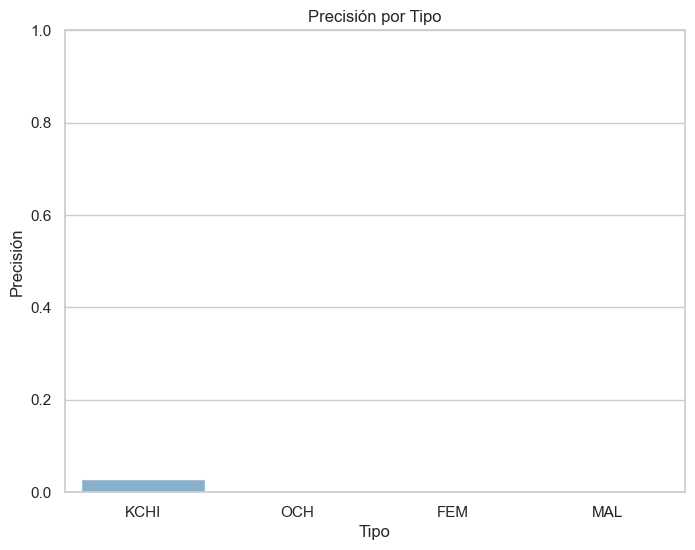

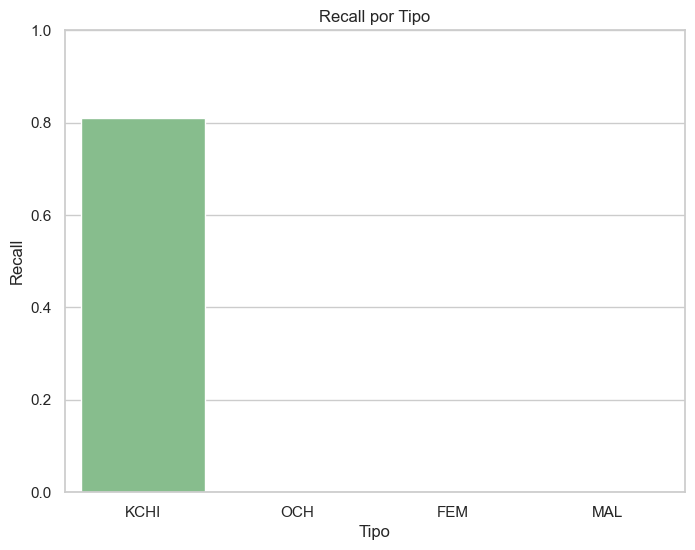

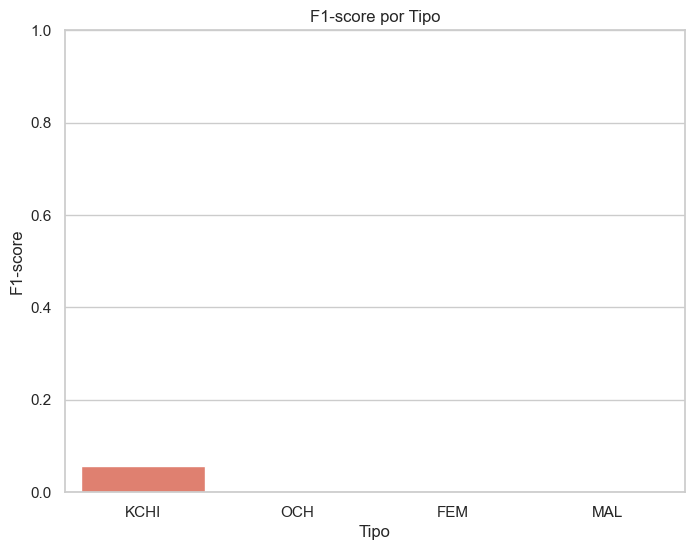

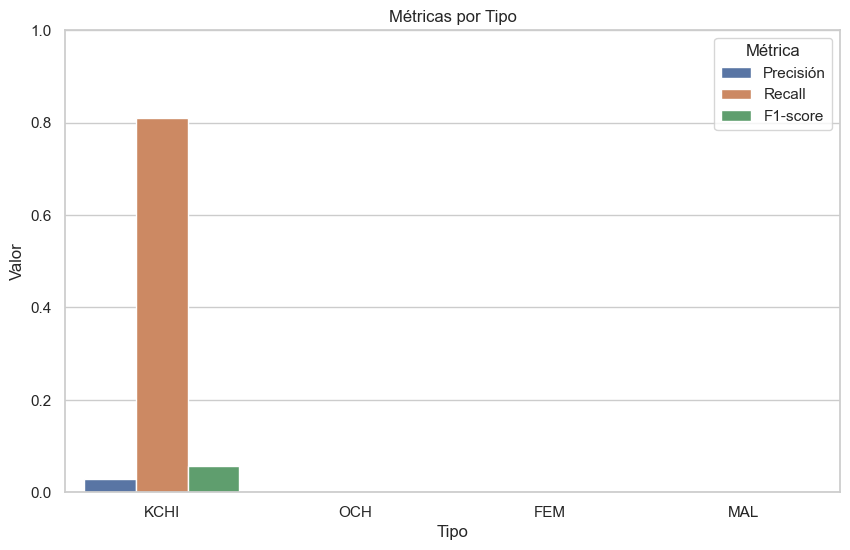

In [29]:
# Generar gráficos
sns.set(style="whitegrid")

# Gráfico de barras para Precisión
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo', y='Precisión', data=df_metrics, palette='Blues_d')
plt.title('Precisión por Tipo')
plt.ylim(0, 1)
plt.ylabel('Precisión')

# Guardar la figura como un archivo PNG
plt.savefig(f'resultados/{name}/precision_{name}.png', dpi=300, bbox_inches='tight')

plt.show()

# Gráfico de barras para Recall
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo', y='Recall', data=df_metrics, palette='Greens_d')
plt.title('Recall por Tipo')
plt.ylim(0, 1)
plt.ylabel('Recall')

# Guardar la figura como un archivo PNG
plt.savefig(f'resultados/{name}/recall_{name}.png', dpi=300, bbox_inches='tight')

plt.show()

# Gráfico de barras para F1-score
plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo', y='F1-score', data=df_metrics, palette='Reds_d')
plt.title('F1-score por Tipo')
plt.ylim(0, 1)
plt.ylabel('F1-score')
# Guardar la figura como un archivo PNG
plt.savefig(f'resultados/{name}/f1score_{name}.png', dpi=300, bbox_inches='tight')
plt.show()

# Gráfico combinado
df_metrics_melted = pd.melt(df_metrics, id_vars=['Tipo'], value_vars=['Precisión', 'Recall', 'F1-score'], var_name='Métrica', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo', y='Valor', hue='Métrica', data=df_metrics_melted)
plt.title('Métricas por Tipo')
plt.ylim(0, 1)
plt.ylabel('Valor')
plt.legend(title='Métrica')

# Guardar la figura como un archivo PNG
plt.savefig(f'resultados/{name}/combinado_{name}.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
# Seleccionar las columnas que empiezan con "Diar_"
diar_columns = [col for col in df_resultados.columns if col.startswith('Diar_')]

# Cambiar los valores de 1 a 0.8 en esas columnas
df_resultados[diar_columns] = df_resultados[diar_columns].replace(1, 0.8)

In [ ]:
# Definir las columnas que deseas graficar
columns_to_plot = ['Elan_FEM', 'Diar_FEM']

# Definir colores contrastantes
colors = ['#FF6347', '#4682B4']  # Tomato y SteelBlue

# Crear la gráfica de dispersión para mostrar solo los estados sin transiciones
plt.figure(figsize=(14, 8))

# Graficar solo los puntos donde el valor es 1
for i, column in enumerate(columns_to_plot):
    plt.scatter(df_resultados.index, df_resultados[column], label=column, color=colors[i], s=10)

# Configuración del gráfico
plt.title('Estados de Elan_FEM y Diar_FEM')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Valores Binarios')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(0, 3000)

# Guardar la figura como un archivo PNG
# plt.savefig(f'binarios_{name}.png', dpi=300, bbox_inches='tight')
# Mostrar la gráfica
plt.show()


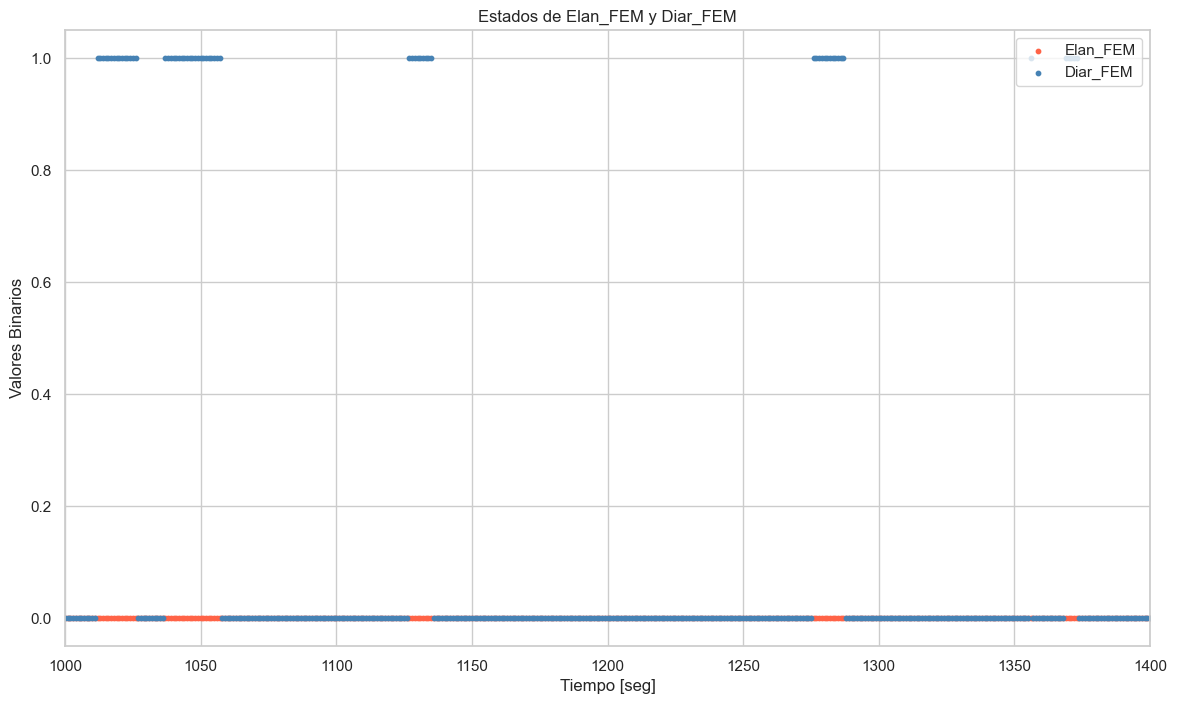

In [26]:
# Definir las columnas que deseas graficar
columns_to_plot = ['Elan_FEM', 'Diar_FEM']

# Definir colores contrastantes
colors = ['#FF6347', '#4682B4']  # Tomato y SteelBlue

# Crear la gráfica de dispersión para mostrar solo los estados sin transiciones
plt.figure(figsize=(14, 8))

# Graficar solo los puntos donde el valor es 1
for i, column in enumerate(columns_to_plot):
    plt.scatter(df_resultados.index, df_resultados[column], label=column, color=colors[i], s=10)

# Configuración del gráfico
plt.title('Estados de Elan_FEM y Diar_FEM')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Valores Binarios')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlim(1000, 1400)

# Guardar la figura como un archivo PNG
# plt.savefig(f'binariosShort_{name}.png', dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()